# 3 лаба: метод стрельбы и квазилинеаризации

### Решение краевой задачи методом стрельбы

#### Идея:
"Стрелять", подбирая параметры, чтобы ОДУ сошлось

#### Для чего используется:
1. Краевые задачи.
2. Оптимизация: подбор параметров системы, для корректировки целевой функции.
3. Контроль: В теории управления метод стрельбы применяется для поиска оптимальных траекторий систем, например, для управления движением ракеты.

### В нашем случае имеем краевую задачу, которую будем сводить к ОДУ для решения задачи Коши:

$$y'' + sin(y) = 0, 0 < x < x_k$$
$$ y(0) = 0, y(x_k) = pi $$
$$x_k = 0.5, 1, 2, 4, 6$$


Преобразуем для метода стрельбы в ОДУ:

$ u' = v $  
$ v' = -sin(u) $

Алгоритм:
- Выбираем z
- Решаем задачу Коши
- Смотрим расхождение
- Корректируем z
- Повторяем

Решение сошлось за 25 итераций.
Решение для x_k = 0.5: y(0) = 0.0, y(x_k) = 3.1415912295099915

Решение сошлось за 27 итераций.
Решение для x_k = 1: y(0) = 0.0, y(x_k) = 3.14159208055543

Решение сошлось за 27 итераций.
Решение для x_k = 2: y(0) = 0.0, y(x_k) = 3.1415909817397027

Решение сошлось за 30 итераций.
Решение для x_k = 4: y(0) = 0.0, y(x_k) = 3.1415918200540447

Решение сошлось за 34 итераций.
Решение для x_k = 6: y(0) = 0.0, y(x_k) = 3.141592191352539



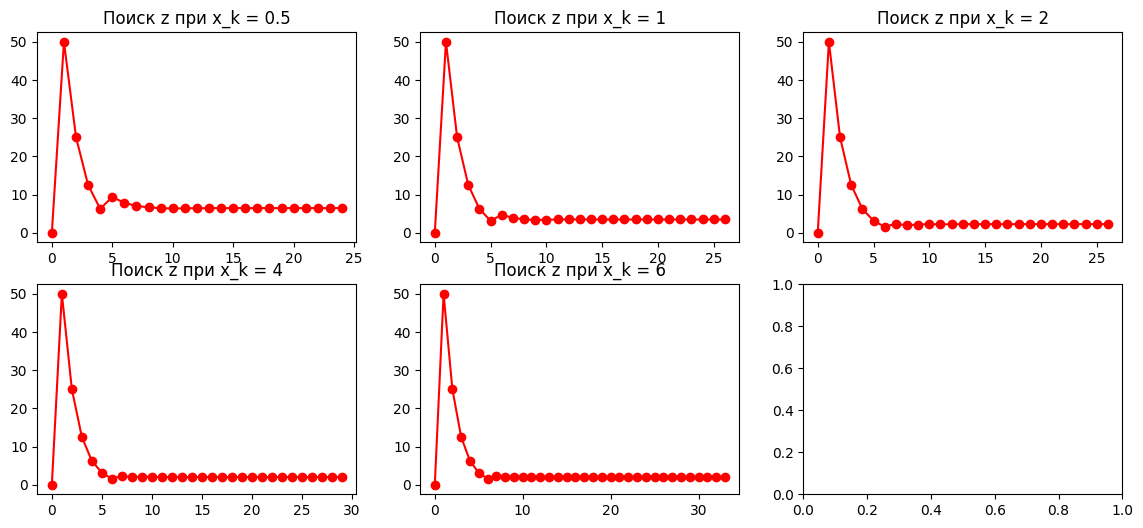

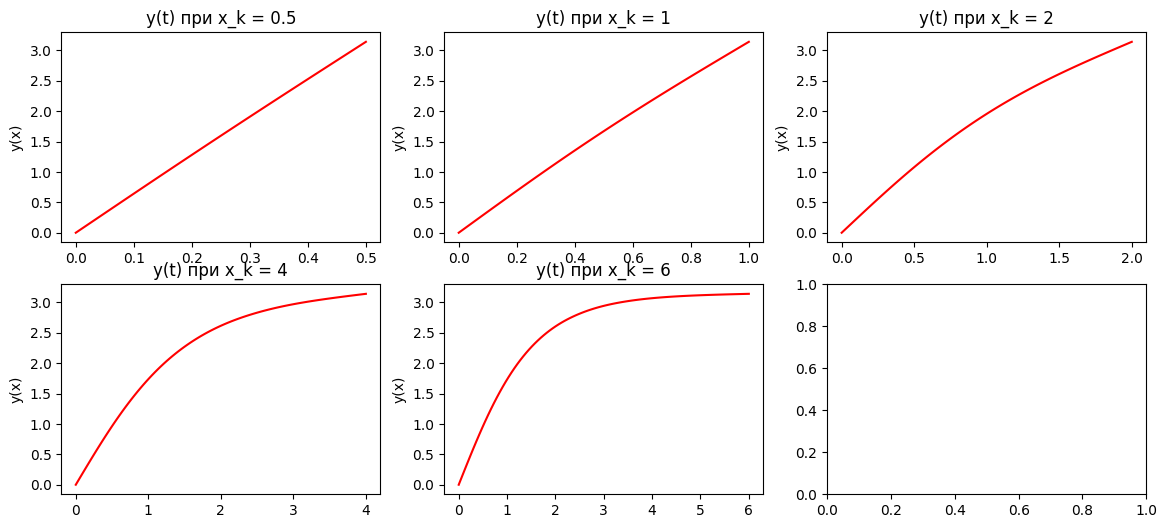

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def ode_system(x, y):
    u, v = y
    return [v, -np.sin(u)]

def shooting_method(x_k, epsilon=1e-6, max_iter=100000):

    def diff_sol(z):
        # Решаем задачу Коши с помощью scipy юхууу
        sol = solve_ivp(ode_system, [0, x_k], [0, z], dense_output=True)
        return sol.y[0, -1] - np.pi

    # Поиск значения z методом бисекции
    z_values = []
    z_left = -100
    z_right = 100
    z = (z_left + z_right) / 2
    
    
    for j in range(max_iter):
        
        z_values.append(z)
        
        diff = diff_sol(z)
        
        if diff > 0:
            z_right = z
        else:
            z_left = z
        z = (z_left + z_right) / 2
        
        if abs(diff) < epsilon:
            print(f"Решение сошлось за {j+1} итераций.")
            break
        
    if diff >= epsilon:
        print(f"WARNING! Решение не сошлось за {max_iter} итераций.")

    # Решение задачи Коши с найденным z
    sol = solve_ivp(ode_system, [0, x_k], [0, z], dense_output=True)
    return sol, z_values

# Вызов метода стрельбы для x_k = 0.5
x_k = [0.5, 1, 2, 4, 6]

fig, ax = plt.subplots(2, 3, figsize=(14, 6))
fig1, bx = plt.subplots(2, 3, figsize=(14, 6))

for i in range(len(x_k)):
    sol, z_values = shooting_method(x_k[i])
    
    print(f"Решение для x_k = {x_k[i]}: y(0) = {sol.sol(0)[0]}, y(x_k) = {sol.sol(x_k[i])[0]}\n")
    
    ax[i // 3, i % 3].plot([i for i in range(len(z_values))], z_values, marker='o', color='red')
    ax[i // 3, i % 3].set_title("Поиск z при x_k = " + str(x_k[i]))
    
    t_values = np.linspace(0, x_k[i], 100)
    y_values = sol.sol(t_values)[0]
    bx[i // 3, i % 3].plot(t_values, y_values, marker='', color='red')
    bx[i // 3, i % 3].set_title("y(t) при x_k = " + str(x_k[i]))
    # bx[i // 3, i % 3].set_xlabel('t')
    bx[i // 3, i % 3].set_ylabel('y(x)')



#### Плюсы метода стрельбы:
- Простота для понимания.
- Простая реализация, с помощью библиотечных функций для решения стандартного ОДУ.

#### Минусы:
- Чувтсвительной к начальному приближению z, может и не сойтись.
- Если решение сложное, нелинейное или с особенностями, может не сходиться.
- Если система выского порядка, нужно будет подбирать много параметров.

# Метод квазилинеаризации

### Идея
Метод квазилинеаризации основан на идее приближения нелинейного уравнения последовательностью линейных уравнений путём линеаризации исходного уравнения вокруг текущего приближения решения.

#### Для чего используется:
- Нелинейные краевые задачи: решение нелинейных краевых задач для ОДУ, где другие методы могут быть неэффективны или не сходиться.
- Оптимизация: аналогично предыдущему методу.
- Физика и инженерия: например, гидродинамика, теплопередача, теория упругости.

### Решение нашей краевой задачи:

Линеаризация уравнения:
    $$ sin(y) ≈ sin(y_i) + cos(y_i) * (y - y_i) $$
    $$ y'' + cos(y_i) * y = sin(y_i) - cos(y_i) * y_i $$

Для решения линейной краевой задачи будем использовать метод конечных разностей.

Повторяем предыдущие пункты.

Решение сошлось за 6 итераций.
Решение для x_k = 0.5: y(0) = 0.0, y(x_k) = 3.141592653589793

Решение сошлось за 12 итераций.
Решение для x_k = 1: y(0) = 0.0, y(x_k) = 3.141592653589793



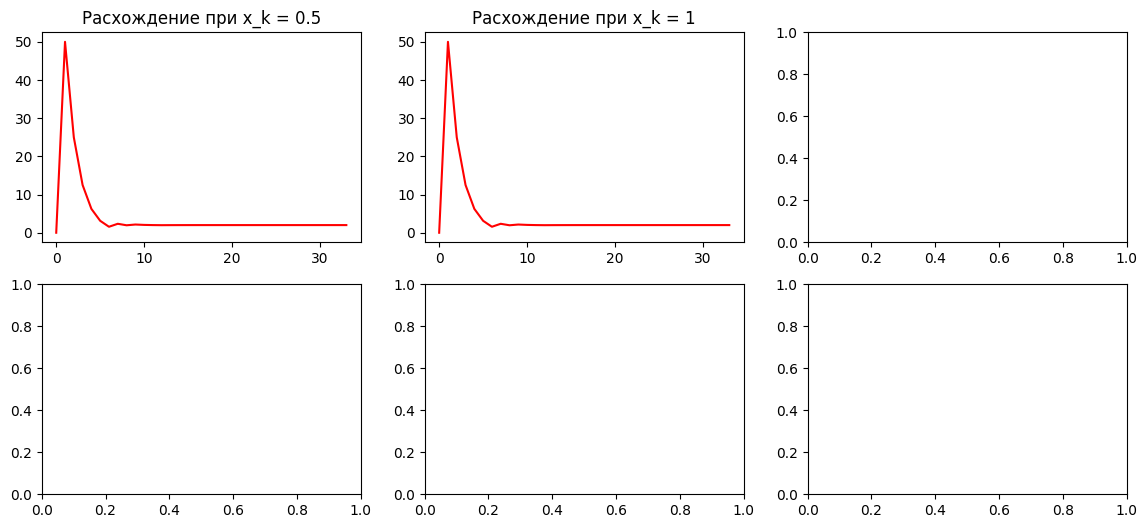

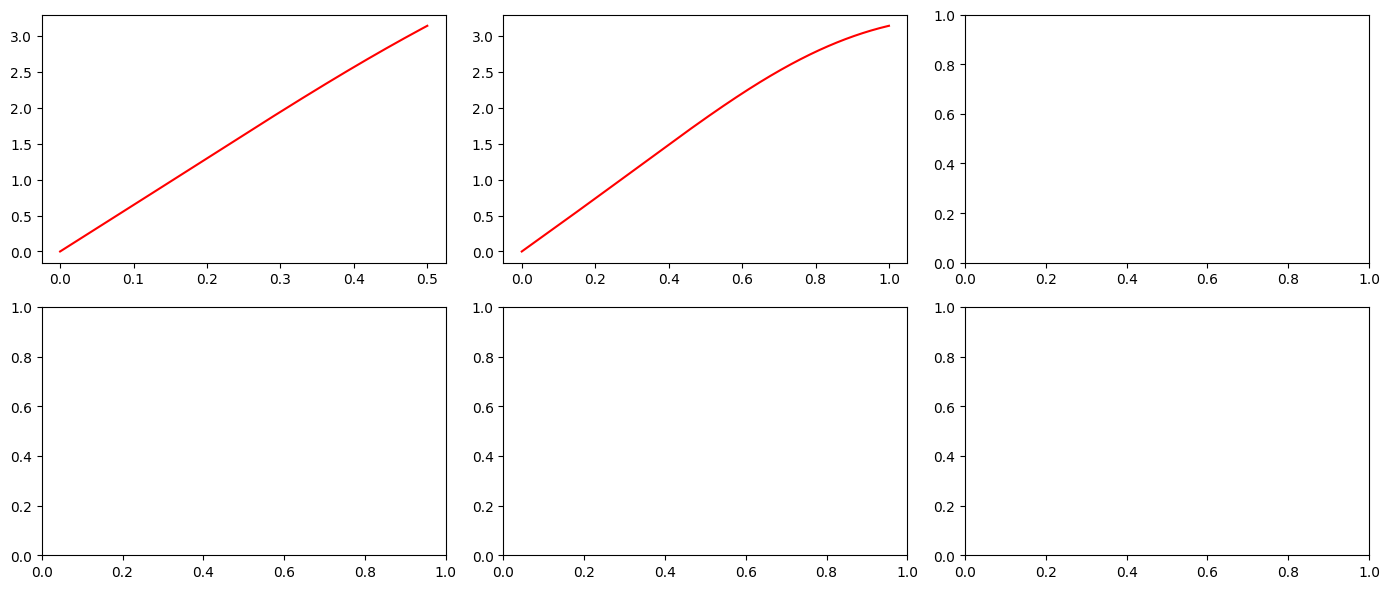

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

def quasilinearization_method(x_k, y_a, y_b, N=1000, epsilon=1e-6, max_iter=100000):
    x = np.linspace(0, x_k, N + 1)
    h = x[1] - x[0]
    diff_values = []

    # Начальное приближение
    y = np.linspace(y_a, y_b, N + 1)
    y[0] = 0
    y[-1] = y_b

    
    for j in range(max_iter):
        # Матрица и вектор правой части
        A = np.zeros((N + 1, N + 1))
        b = np.zeros(N + 1)

        # Граничные условия
        A[0, 0] = 1
        b[0] = y_a
        A[-1, -1] = 1
        b[-1] = y_b

        # Внутренняя часть
        for i in range(1, N):
            A[i, i - 1] = 1 / h**2
            A[i, i] = - 2 / h**2 - np.cos(y[i])
            A[i, i + 1] = 1 / h**2
            b[i] = - np.sin(y[i]) + np.cos(y[i]) * y[i]


        y_new = spsolve(csc_matrix(A), b)
        diff = np.max(np.abs(y_new - y))
        diff_values.append(diff)
        
        if diff < epsilon:
            print(f"Решение сошлось за {j+1} итераций.")
            break

        y = y_new
    
    if diff_values[-1] >= epsilon:
        print(f"WARNING! Решение не сошлось за {max_iter} итераций.")
        
    # Для красивого вывода:
    for i in range(len(y)):
        if np.abs(y[i]) < 1e-8:
            y[i] = 0.0

    return x, y, diff_values


# x_k = 0.5 # Конечное значение x
y_a = 0 # Граничное условие y(0)
y_b = np.pi # Граничное условие y(x_k)


# x_k = [0.5, 1, 2, 4, 6]
x_k = [0.5, 1]

fig, ax = plt.subplots(2, 3, figsize=(14, 6))
fig1, bx = plt.subplots(2, 3, figsize=(14, 6))

for i in range(len(x_k)):
    x, y, diff_vlues = quasilinearization_method(x_k[i], y_a, y_b)
    print(f"Решение для x_k = {x_k[i]}: y(0) = {y[0]}, y(x_k) = {y[-1]}\n")
    
    
    ax[i // 3, i % 3].plot([i for i in range(len(z_values))], z_values, marker='', color='red')
    ax[i // 3, i % 3].set_title("Расхождение при x_k = " + str(x_k[i]))
    
    bx[i // 3, i % 3].plot(x, y, marker='', color='red')
    

    
    # ax[i // 3, i % 3].plot([i for i in range(len(z_values))], z_values, marker='o', color='red')
    
    # t_values = np.linspace(0, x_k[i], 100)
    # y_values = sol.sol(t_values)[0]
    # bx[i // 3, i % 3].plot(t_values, y_values, marker='', color='red')
    # ax[i // 3, i % 3].set_title("y(t) при z_k = " + str(x_k[i]))
    # bx[i // 3, i % 3].set_xlabel('t')
    # bx[i // 3, i % 3].set_ylabel('y(t)')

plt.tight_layout()
plt.show()

Плюсы:
- Квадратичная сходимость: сходится квадратично, т.е. количество верных цифр в решении удваивается на каждой итерации.
- Устойчивость: более устойчив для нелинейных задач.
- Возможность решения сложных задач: подходит для решения более сложных задач, с которыми не справляются более простые методы.

Минусы:
- Сложность линеаризации: процесс линеаризации уравнения может быть сложным.
- Не всегда сходится: сходимость метода зависит от выбора начального приближения и характера нелинейности.
- Вычислительная сложность: решение линейной системы на каждой итерации, лично у меня он считался довольно долго, чтобы получить достаточно хорошие графики.